<a href="https://colab.research.google.com/github/VeronikaShe/ML-study_HW_3/blob/main/HW_3_log_clear_roc_SHEMYAKINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Пункт 1 и 2

- Загружаем данные.

- Удаляем все пропущенные значения и категориальные переменные.

- Обучаем модель логистической регрессии.

- Считаем метрику качества.


In [219]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [220]:
# датасет
data = pd.read_csv('https://raw.githubusercontent.com/VeronikaShe/ML-study_HW_3/refs/heads/main/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId: Уникальный индекс/номер строки. Начинается с 1 (для первой строки) и увеличивается на 1 для каждой следующей. Рассматриваем его как индентификатор строки и, что логично, идентификатор пассжира (т.к. для каждого пассажира в датасете представлена только одна строка).

Survived: Признак, показывающий был ли спасен данный пассажир или нет. 1 означает, что удалось выжить, и 0 - не удалось спастись.

Pclass: Класс билета. 1 - означает Первый класс билета. 2 - означает Второй класс билета. 3 - означает Третий класс билета.

Name: Имя пассажира. Имя также может содержать титулы и обращения. “Mr” для мужчин. “Mrs” для женщин. “Miss” для девушек (тут имеется в виду что для тех, кто не замужем, так было принято, да и сейчас тоже, говорить в западном обществе). “Master” для юношей.

Sex: Пол пассажира. Либо мужчины (=Male) оибо женщины (=Female).

Age: Возраст пассажира. “NaN” значения в этой колонке означают, что возраст данного пассажира отсутствует/неизвестен/или не был записанv в датасет.

SibSp: Количество братьев/сестер или супругов, путешествующих с каждым пассажиром.

Parch: Количество родителей детей (Number of parents of children travelling with each passenger).

Ticket: Номер билета.

Fare: Сумма, которую заплатил пассажир за путешествие.

Cabin: Номер каюты пассажира. “NaN” значения в этой колонке указавает на то, что номер каюты данного пассажира не был записан.

Embarked: Порт отправления данного пассажира.

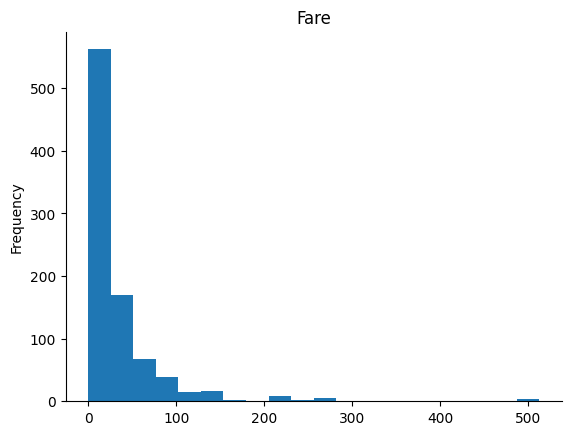

In [221]:
# @title Fare

from matplotlib import pyplot as plt
data['Fare'].plot(kind='hist', bins=20, title='Fare')
plt.gca().spines[['top', 'right',]].set_visible(False)

Удаляем все категориальные переменные.


In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [223]:
data['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [224]:

data = data[['PassengerId','Pclass','SibSp','Age','Parch','Fare','Survived']]

In [225]:
data.describe()

,PassengerId,Pclass,SibSp,Age,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.523008,29.699118,0.381594,32.204208,0.383838
std,257.353842,0.836071,1.102743,14.526497,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,20.125000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,0.000000,28.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,1.000000,38.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,8.000000,80.000000,6.000000,512.329200,1.000000


In [226]:
data.replace('?', np.nan , inplace=True)

In [227]:
data.isna().sum()

,0
PassengerId,0
Pclass,0
SibSp,0
Age,177
Parch,0
Fare,0
Survived,0


In [228]:
# удаляем ячейки с отсутствием данных
data = data[~(data['Age'].isna())]

In [229]:
data.isna().sum()

,0
PassengerId,0
Pclass,0
SibSp,0
Age,0
Parch,0
Fare,0
Survived,0


In [230]:
y = pd.Series(data = np.ravel(data[['Survived']]))
X = data[['PassengerId','Pclass','SibSp','Age','Parch','Fare']]

Шаг 1 Предобработка данных.


Как и ожидалось согласно здравому смыслу. Номер билета не оказывает влияния на возможность выжить. Это видно по коэффициенту полиномиальной регрессии.


In [231]:
from sklearn.linear_model import LogisticRegression

In [232]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(max_iter=500)

Шаг 2 Обучение


 Поделим данные на обучающую выборку и тестовую. Указываем в test_size долю датасета, которая пойдет на тестовую выбору

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test.index

Index([149, 407,  53, 369, 818, 549,  85, 774, 100, 816,
       ...
       117,   8, 114, 684, 537, 676, 493, 479, 278, 174],
      dtype='int64', length=215)

In [234]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)


LogisticRegression(max_iter=500)

In [235]:
predictions0 = model.predict(X_test)

In [236]:
predictions = model.predict_proba(X_test)

<p>Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.</p>

In [237]:
model.score(X_train, y_train)

0.6913827655310621

In [238]:
model.score(X_test, y_test)

0.7069767441860465

Считаем accuracy последней модели

In [239]:
from sklearn.metrics import recall_score, precision_score, accuracy_score


In [240]:
pred = model.predict(X_test)

In [241]:
recall_score(y_test, pred), precision_score(y_test, pred)

(0.4943820224719101, 0.7096774193548387)

ROC


In [242]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [243]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

In [88]:
import matplotlib.pyplot as plt
import numpy as np

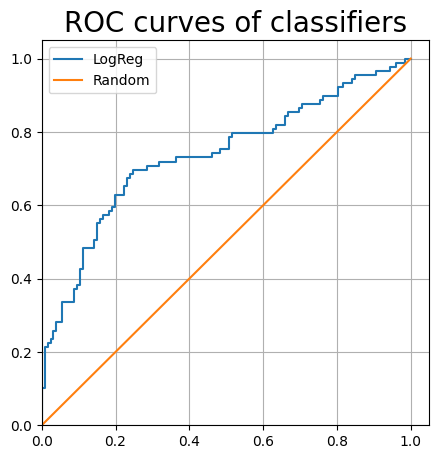

In [89]:
plt.figure(figsize=(5,5))
plt.title('ROC curves of classifiers', fontsize=20)
plt.plot(fpr, tpr, label='LogReg')
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label='Random')
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.grid()
plt.legend()
plt.show()

## Пункт 3.

Построим еще одну модель.

In [244]:
# датасет
data2 = pd.read_csv('https://raw.githubusercontent.com/VeronikaShe/ML-study_HW_3/refs/heads/main/train.csv')
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Пункт 6.

Переведем категорийльные переменные в цифровые значения.


In [245]:
le = LabelEncoder()
le.fit(data2['Sex'])
sex = le.transform(data2['Sex'])

le.fit(data2['Cabin'])
cabin = le.transform(data2['Cabin'])

le.fit(data2['Embarked'])
embarked = le.transform(data2['Embarked'])

data2 = pd.DataFrame({'Cabin':cabin,'Sex': sex,'Embarked': embarked,'PassengerId':data2.PassengerId, 'Pclass':data2.Pclass, 'Age':data2.Age, 'SibSp':data2.SibSp, 'Parch':data2.Parch, 'Fare':data2.Fare, 'Survived':data2.Survived })

## Пункт 4.

Удаляем признаки, которые логически не нужны для построения модели.

Идентификатор пассажира - не оказывает большого влияния на переменную, т.к. данные не упорядочены. Это подтверждает очень маленькая отрицательная корреляция.

Name - не оказывает влияния, т.к. по нему не построить зависимость оно уникально.

Номер билета - аналогично Name.

SibSp, Parch - также не оказывает существенного влияния, что видно по маленькой корреляции.


In [246]:
data2.Survived.corr(data2.PassengerId), data2.Survived.corr(data2.Pclass),   data2.Survived.corr(data2.Age), data2.Survived.corr(data2.SibSp), data2.Survived.corr(data2.Parch), data2.Survived.corr(data2.Fare), data2.Survived.corr(data2.Cabin), data2.Survived.corr(data2.Sex), data2.Survived.corr(data2.Embarked)

(np.float64(-0.005006660767066504),
 np.float64(-0.3384810359610148),
 np.float64(-0.07722109457217768),
 np.float64(-0.03532249888573564),
 np.float64(0.08162940708348371),
 np.float64(0.2573065223849625),
 np.float64(-0.25488786482849946),
 np.float64(-0.5433513806577555),
 np.float64(-0.16351665142509889))

In [247]:
data2 = data2.drop(columns=['PassengerId','SibSp','Parch'])

## Пункт 7.

Проверяем данные на наличие выбросов.

In [248]:
data2.describe()

,Cabin,Sex,Embarked,Pclass,Age,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,130.744108,0.647587,1.538721,2.308642,29.699118,32.204208,0.383838
std,36.024237,0.477990,0.794231,0.836071,14.526497,49.693429,0.486592
min,0.000000,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,147.000000,0.000000,1.000000,2.000000,20.125000,7.910400,0.000000
50%,147.000000,1.000000,2.000000,3.000000,28.000000,14.454200,0.000000
75%,147.000000,1.000000,2.000000,3.000000,38.000000,31.000000,1.000000
max,147.000000,1.000000,3.000000,3.000000,80.000000,512.329200,1.000000


<Axes: ylabel='Fare'>

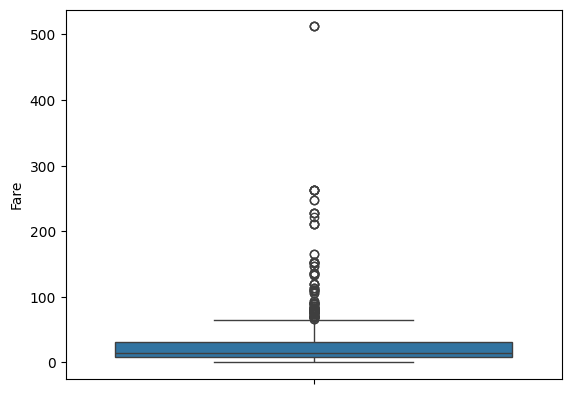

In [249]:
sns.boxplot(data2.Fare)

Значение Fare > 500 на порядки превосходит среднее. Удаляю как выброс.

In [250]:
data2 = data2[data2['Fare'] <= 300]

In [251]:
data2.replace('?', np.nan , inplace=True)

## Пункт 5.

Проверяем на наличие пропущеных значений


In [252]:
data2.isna().sum()

,0
Cabin,0
Sex,0
Embarked,0
Pclass,0
Age,177
Fare,0
Survived,0


In [253]:
data2.Age.isna().sum()/data2.Age.count()

np.float64(0.2489451476793249)

Если просто удалить строки дата-сета с пустыми значениями возраста, то ~ 25% строк нужно будет удалить.

Заполним пропуски Age средним значением

In [254]:
data2.replace(np.nan, 30, inplace=True)

## Пункт 10.

Обучим модель на преобразованных данных.

In [255]:
y2 = pd.Series(data = np.ravel(data2[['Survived']]))
X2 = data2.drop(columns=['Survived'])

In [256]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
X2_test.index

Index([281, 435,  39, 418, 585, 806, 343, 837, 581, 537,
       ...
       327, 133, 463, 543, 465, 454, 632, 694, 743, 430],
      dtype='int64', length=267)

In [257]:
model2 = LogisticRegression(max_iter=500)

In [258]:
model2.fit(X2_train, y2_train)

LogisticRegression(max_iter=500)

In [259]:
predictions02 = model2.predict(X2_test)

In [260]:
predictions2 = model2.predict_proba(X2_test)

In [261]:
model2.score(X2_train, y2_train)

0.789049919484702

In [262]:
model2.score(X2_test, y2_test)

0.8277153558052435

In [263]:
fpr2, tpr2, thres2 = roc_curve(y2_test, predictions2[:, 1])

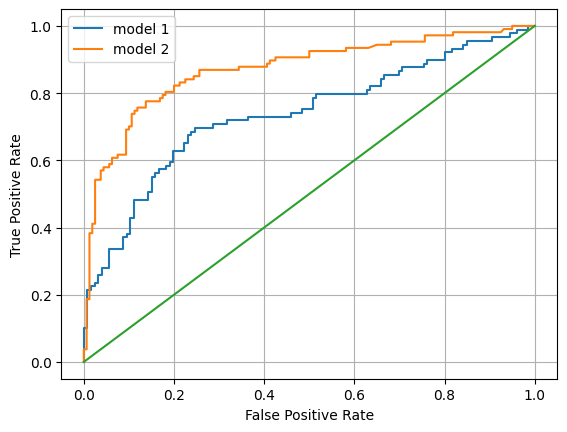

In [264]:
plt.plot(fpr, tpr, label='model 1' )
plt.plot(fpr2, tpr2, label='model 2')
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0)
plt.grid()
plt.show()

Посчитаем площадь под ROC-кривой для двух моделей

In [265]:
from sklearn.metrics import roc_auc_score

In [266]:
roc_auc_score(y_test, predictions[:, 1]).round(2)

np.float64(0.74)

In [267]:
roc_auc_score(y2_test, predictions2[:, 1]).round(2)

np.float64(0.87)

## Пункт 11.

Вывод

a) преобразования с данными:
- замена '?' на NaN,
- замена в дата-сете пропущенных значений Age на среднее,
- признаки с тестовыми значениями трасформированы в числовые, в том чиле пустые значения транформированы в числовые
- вычищено значение Fare, на порядок превышающее остальные (чтобы не преуменьшать влияние признака).

b) cравнение точности двух моделей:
- точность Модели логистической регрессии на тестовой выборке до преобразования данных: 0.7069767441860465
- точность Модели логистической регрессии на тестовой выборке после преобразования данных: 0.7947761194029851

Преобразование исходных даных улучшило точность модели.
Для повышения точности нужно:
- преобразовать Sex и пр. в отдельные признаки по категориям.
- возвести в степень возраст

AUC для модели на преобразованных данных ближе к 1, чем AUC на сырых.

с) На небольших дата-сетах модель более чувствительна к качеству данных. Данные необходимо очищать и преобразовывать для повышения точности модели.